In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
data = './hw2.csv'
# day_dict = {'Sun': 1, 'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5, 'Fri': 6, 'Sat': 7}

In [17]:
twitter_data = pd.read_csv(data)
twitter_data = twitter_data.replace('null;', 0)

In [18]:
twitter_data = twitter_data

In [19]:
twitter_data['Positive_sentiment'] = twitter_data['Sentiment'].str[0].astype(int)
twitter_data['Negative_sentiment'] = twitter_data['Sentiment'].str[2:4].astype(int)

In [20]:
twitter_data = twitter_data.drop(columns=['Sentiment','Entities'])

In [21]:
twitter_data['Tweet_day'] = twitter_data['Timestamp'].str[0:3]
le_day = LabelEncoder()
twitter_data['Tweet_day_n'] = le_day.fit_transform(twitter_data['Tweet_day'])

In [22]:
twitter_data['Tweet_hour'] = twitter_data['Timestamp'].str[10:13].astype(int)

In [23]:
twitter_data['#Mentions'] = twitter_data['Mentions'].str.split()
twitter_data['#Mentions'] = twitter_data['#Mentions'].str.len()
twitter_data['#Mentions'] = twitter_data['#Mentions'].fillna(0)
twitter_data['#Mentions'] = twitter_data['#Mentions'].astype(int)

In [24]:
twitter_data['#Hashtags'] = twitter_data['Hashtags'].str.split()
twitter_data['#Hashtags'] = twitter_data['#Hashtags'].str.len()
twitter_data['#Hashtags'] = twitter_data['#Hashtags'].fillna(0)
twitter_data['#Hashtags'] = twitter_data['#Hashtags'].astype(int)

In [25]:
twitter_data

,Tweet ID,Username,Timestamp,#Followers,#Friends,#Retweets,#Favorites,Mentions,Hashtags,URLs,Positive_sentiment,Negative_sentiment,Tweet_day,Tweet_day_n,Tweet_hour,#Mentions,#Hashtags
0,1178791787386814465,35234fe4a19cc1a3336095fb3780bcc1,Mon Sep 30 22:00:37 +0000 2019,619,770,0,0,0,0,0,2,-1,Mon,1,22,0,0
1,1178791985106153472,ea4592f39636d87af8fb4b17b7e2e4c0,Mon Sep 30 22:01:24 +0000 2019,36365,19344,13,17,0,0,https://twitter.com/himalayahawk/status/117766...,1,-4,Mon,1,22,0,0
2,1178793230223183872,bf05d1888dd974fa4a8679c25e2ead03,Mon Sep 30 22:06:21 +0000 2019,5018,1933,0,0,0,0,https://goo.gl/fb/uoeiPk:-:,2,-1,Mon,1,22,0,0
3,1178795172206919680,eb8a99bca8945eab1d006750e9b75518,Mon Sep 30 22:14:04 +0000 2019,2219,971,0,0,0,0,0,2,-1,Mon,1,22,0,0
4,1178798309491822592,00695cf79d60e86a5d0f872f4358337a,Mon Sep 30 22:26:32 +0000 2019,9009,4943,26,89,0,VFS,0,2,-1,Mon,1,22,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1179546502076796929,13e64b1c97e36d867d1c579a7dd1849c,Wed Oct 02 23:59:35 +0000 2019,41,193,0,0,cripplespur1,0,0,1,-1,Wed,6,23,1,0
99996,1179546574873141257,564b19153eb32b6a49167eea42d451f0,Wed Oct 02 23:59:53 +0000 2019,2011,1345,1,5,aii0l57❤️❤️❤️.,0,0,3,-1,Wed,6,23,1,0
99997,1179548305589755906,9f6a999aa613403742fd30afeadd9b6d,Thu Oct 03 00:06:45 +0000 2019,294,300,0,0,0,0,0,1,-1,Thu,4,0,0,0
99998,1179550507611906048,b14166b39b4bf8718f62f84dcad0b67d,Thu Oct 03 00:15:30 +0000 2019,169,116,0,0,0,ChicagoMed,0,1,-1,Thu,4,0,0,1


In [27]:
twitter_data['#Followers_log'] = np.log10(twitter_data['#Followers'] + 1)
twitter_data['#Friends_log'] = np.log10(twitter_data['#Friends'] + 1)
twitter_data['#Favorites_log'] = np.log10(twitter_data['#Favorites'] + 1)
twitter_data['#Mentions_log'] = np.log10(twitter_data['#Mentions'] + 1)
twitter_data['#Hashtags_log'] = np.log10(twitter_data['#Hashtags'] + 1)

Skew coefficient:  0.3799455766006705


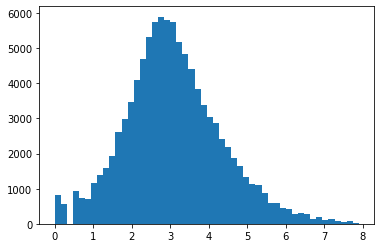

In [28]:
log_num_followers_hist = plt.hist(twitter_data['#Followers_log'], bins=50)
# Normalize here
print('Skew coefficient: ', twitter_data['#Followers_log'].skew())

Skew coefficient:  -0.3130054049315858


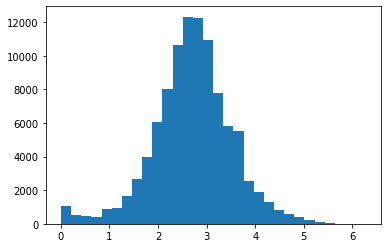

In [29]:
num_friends_hist = plt.hist(twitter_data['#Friends_log'], bins=30)
# Normalize here
print('Skew coefficient: ', twitter_data['#Friends_log'].skew())

Skew coefficient:  1.3121065180212501


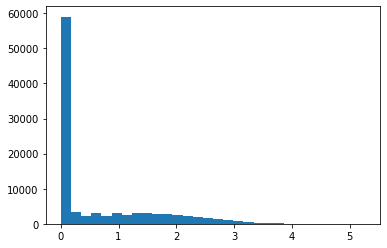

In [30]:
num_friends_hist = plt.hist(twitter_data['#Favorites_log'], bins=30)
# Standard Scaler here
print('Skew coefficient: ', twitter_data['#Favorites_log'].skew())

Skew coefficient:  2.0449340408016967


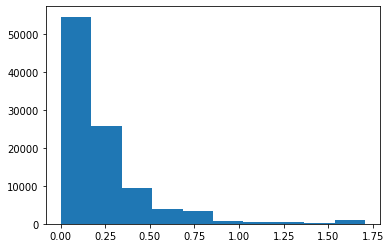

In [31]:
num_friends_hist = plt.hist(twitter_data['#Mentions_log'])
# Standard Scaler here
print('Skew coefficient: ', twitter_data['#Mentions_log'].skew())

Skew coefficient:  2.1402405394868054


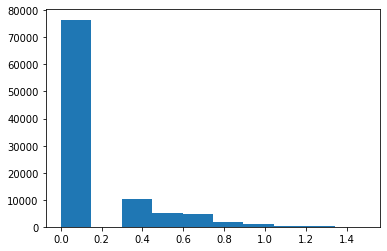

In [32]:
num_friends_hist = plt.hist(twitter_data['#Hashtags_log'])
# Standard Scaler here
print('Skew coefficient: ', twitter_data['#Hashtags_log'].skew())

In [33]:
td_new = twitter_data[['#Retweets', '#Followers_log', '#Friends_log', '#Favorites_log', '#Hashtags_log', '#Mentions_log', 'Positive_sentiment', 'Negative_sentiment', 'Tweet_day_n', 'Tweet_hour']]
td_new

,#Retweets,#Followers_log,#Friends_log,#Favorites_log,#Hashtags_log,#Mentions_log,Positive_sentiment,Negative_sentiment,Tweet_day_n,Tweet_hour
0,0,2.792392,2.887054,0.000000,0.00000,0.00000,2,-1,1,22
1,13,4.560696,4.286569,1.255273,0.00000,0.00000,1,-4,1,22
2,0,3.700617,3.286456,0.000000,0.00000,0.00000,2,-1,1,22
3,0,3.346353,2.987666,0.000000,0.00000,0.00000,2,-1,1,22
4,26,3.954725,3.694078,1.954243,0.30103,0.00000,2,-1,1,22
...,...,...,...,...,...,...,...,...,...,...
99995,0,1.623249,2.287802,0.000000,0.00000,0.30103,1,-1,6,23
99996,1,3.303628,3.129045,0.778151,0.00000,0.30103,3,-1,6,23
99997,0,2.469822,2.478566,0.000000,0.00000,0.00000,1,-1,4,0
99998,0,2.230449,2.068186,0.000000,0.30103,0.00000,1,-1,4,0


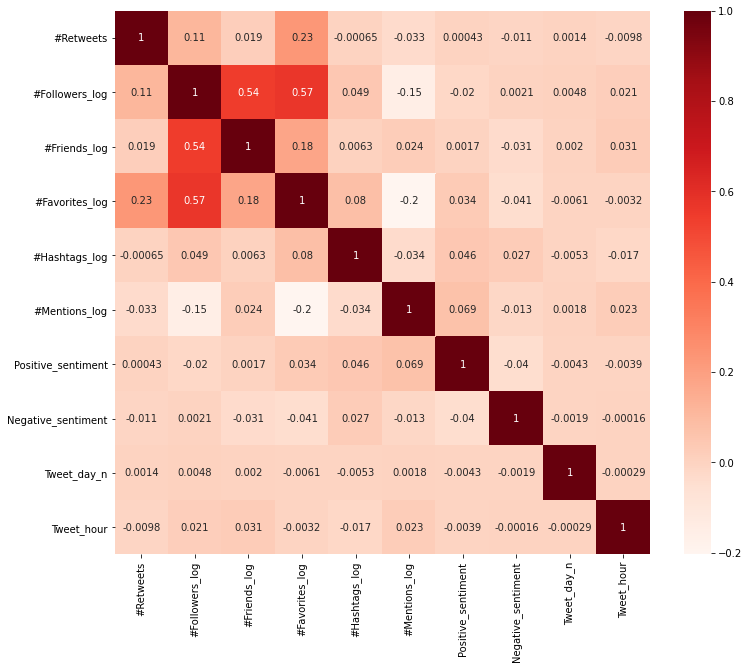

In [34]:
plt.figure(figsize=(12,10))
cor = td_new.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
x = td_new.drop('#Retweets', axis='columns')
y = twitter_data['#Retweets']

In [36]:
# Feature selection here?

In [37]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.56505

In [38]:
# K-fold cross validation?

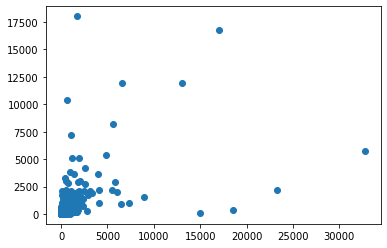

In [39]:
predictions = model.predict(x_test)
scatter_plot = plt.scatter(y_test, predictions)